In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score
import umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_combined_all_z = pd.read_csv(os.path.join(folder_path, "features_combined_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_combined_all_mm = pd.read_csv(os.path.join(folder_path, "features_combined_all_minmax.csv"))

#se quitan las columnas 'filename' y 'label'
df_combined_all_mm_cl= df_combined_all_mm.drop(columns=['label', 'filename'])
df_combined_all_z_cl= df_combined_all_z.drop(columns=['label', 'filename'])

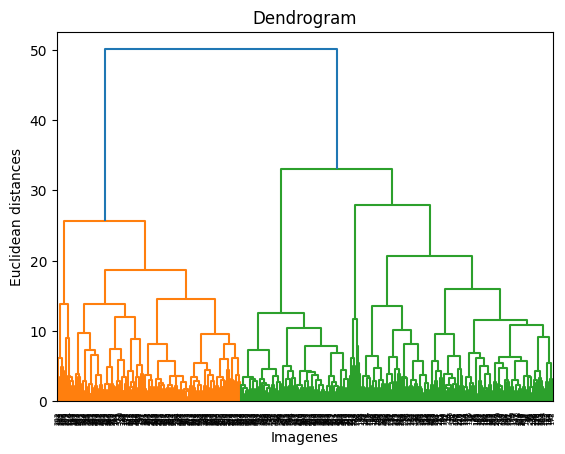

In [3]:
# Using the dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(df_combined_all_z_cl, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Imagenes')
plt.ylabel('Euclidean distances')
plt.show()

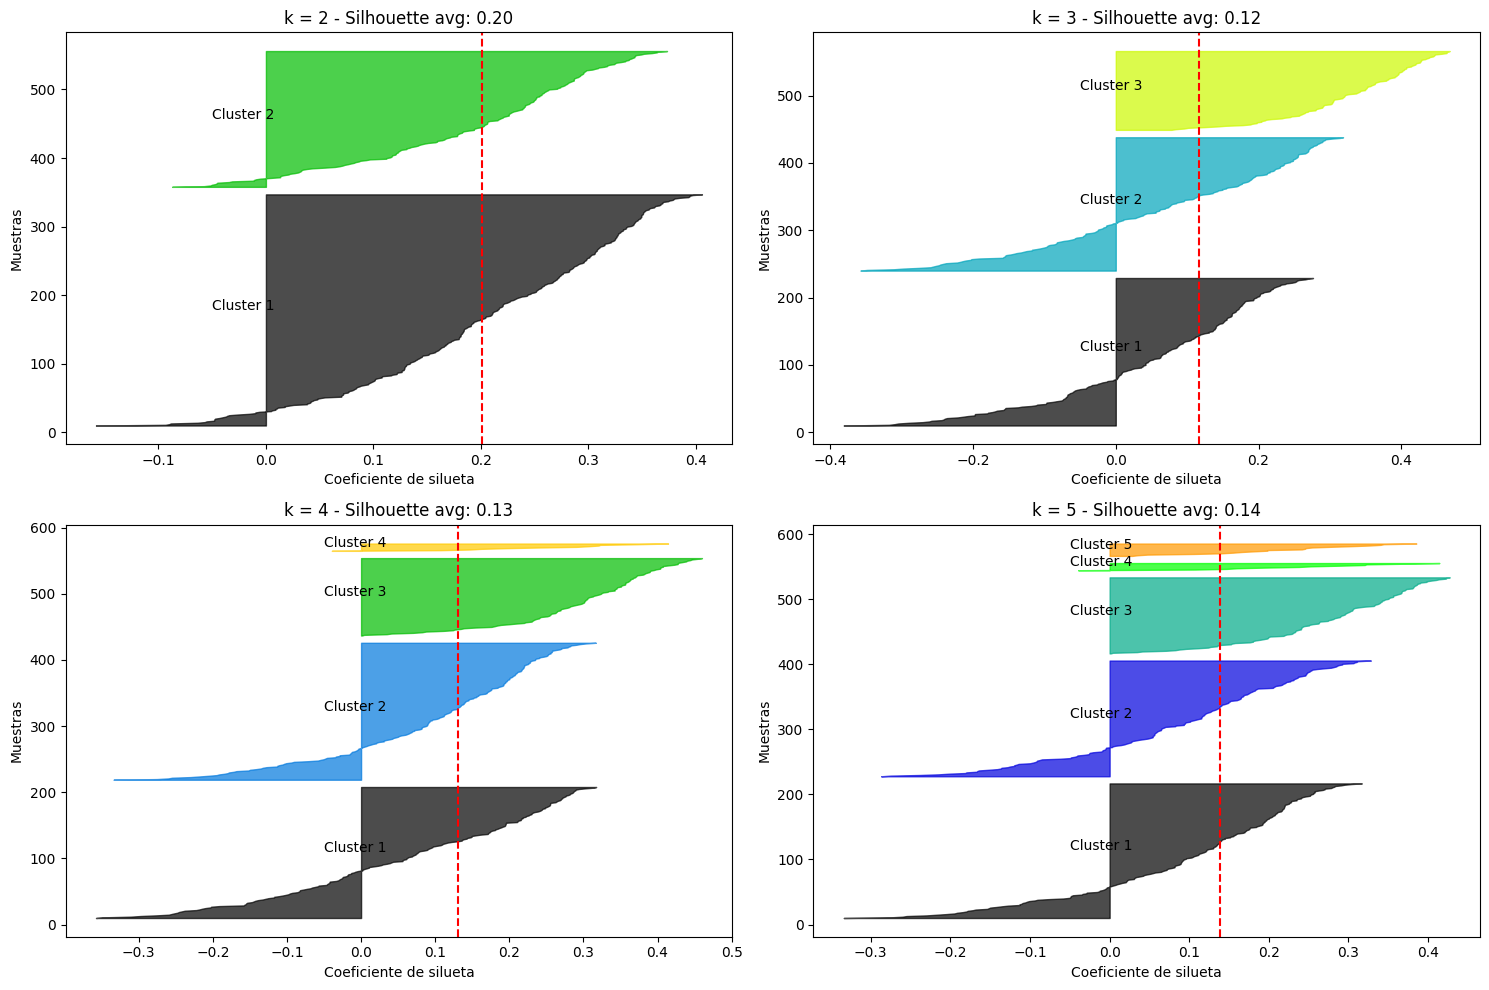

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probar con 2, 3, 4 y 5 clusters
for i, k in enumerate([2, 3, 4, 5]):
    clusterer = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
    labels = clusterer.fit_predict(df_combined_all_z_cl)
    silhouette_vals = silhouette_samples(df_combined_all_z_cl, labels)
    silhouette_avg = silhouette_score(df_combined_all_z_cl, labels)

    # Subplot row/col
    row = i // 2
    col = i % 2
    ax_i = ax[row][col]
    y_lower = 10

    for j in range(k):
        j_silhouette_vals = silhouette_vals[labels == j]
        j_silhouette_vals.sort()
        size = len(j_silhouette_vals)
        y_upper = y_lower + size
        color = cm.nipy_spectral(float(j) / k)
        ax_i.fill_betweenx(np.arange(y_lower, y_upper), 0, j_silhouette_vals,
                           facecolor=color, edgecolor=color, alpha=0.7)
        ax_i.text(-0.05, y_lower + size / 2, f'Cluster {j+1}')
        y_lower = y_upper + 10

    ax_i.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax_i.set_title(f'k = {k} - Silhouette avg: {silhouette_avg:.2f}')
    ax_i.set_xlabel("Coeficiente de silueta")
    ax_i.set_ylabel("Muestras")

plt.tight_layout()
plt.show()

In [116]:
hc_z = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
y_hc_z = hc_z.fit_predict(df_combined_all_z_cl)


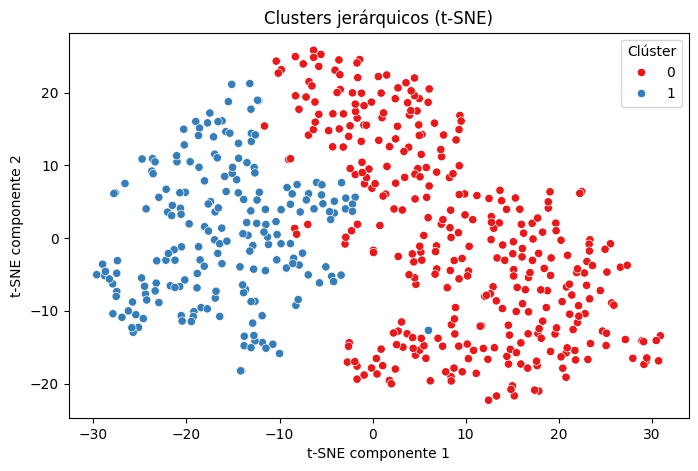

          filename    label  cluster
0      callo_1.png  smaller        1
1     callo_10.png  smaller        1
2    callo_100.png  smaller        0
3    callo_101.png  smaller        0
4    callo_102.png  smaller        0
..             ...      ...      ...
532   callo_95.png   higher        1
533   callo_96.png   higher        1
534   callo_97.png   higher        1
535   callo_98.png   higher        1
536   callo_99.png   higher        1

[537 rows x 3 columns]


In [117]:
#Visualización alternativa con t-SNE (
tsne_z = TSNE(n_components=2, random_state=42)
X_tsne_z = tsne_z.fit_transform(df_combined_all_z_cl)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne_z[:, 0], y=X_tsne_z[:, 1], hue=y_hc_z, palette='Set1')
plt.title('Clusters jerárquicos (t-SNE)')
plt.xlabel('t-SNE componente 1')
plt.ylabel('t-SNE componente 2')
plt.legend(title='Clúster')
plt.show()

df_resultado_z = pd.DataFrame({
    'filename': df_combined_all_z['filename'],
    'label': df_combined_all_z['label'],
    'cluster': y_hc_z
})

print(df_resultado_z)

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


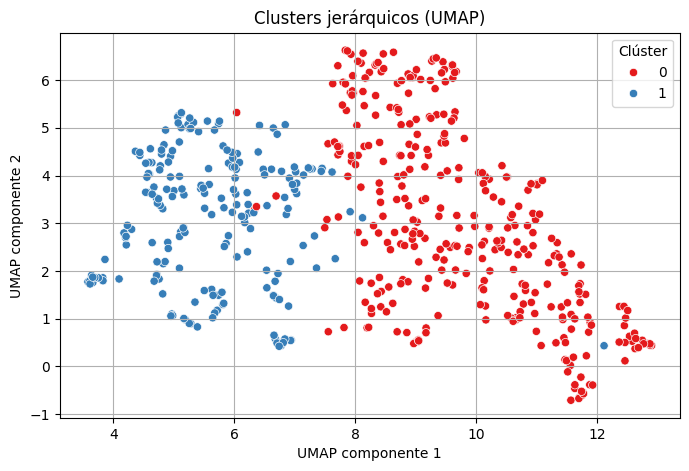

In [118]:
umap_z = umap.UMAP(n_neighbors=10,n_components=2, random_state=42)
X_umap_z = umap_z.fit_transform(df_combined_all_z_cl)


plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_z[:, 0], y=X_umap_z[:, 1], hue=y_hc_z, palette='Set1')
plt.title('Clusters jerárquicos (UMAP)')
plt.xlabel('UMAP componente 1')
plt.ylabel('UMAP componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

In [119]:
# Crear la tabla de contingencia entre 'label' y 'cluster'
contingency_table = pd.crosstab(df_resultado_z['label'], df_resultado_z['cluster'])

# Mostrar la tabla de contingencia
print(contingency_table)

cluster    0    1
label            
higher   120  148
smaller  218   51


In [9]:
# y_hc_z son las etiquetas del clustering, df_fourier_z_cl los datos
score = silhouette_score(df_combined_all_z_cl, y_hc_z)
print(f'Silhouette Score: {score:.3f}')


Silhouette Score: 0.201


minmax

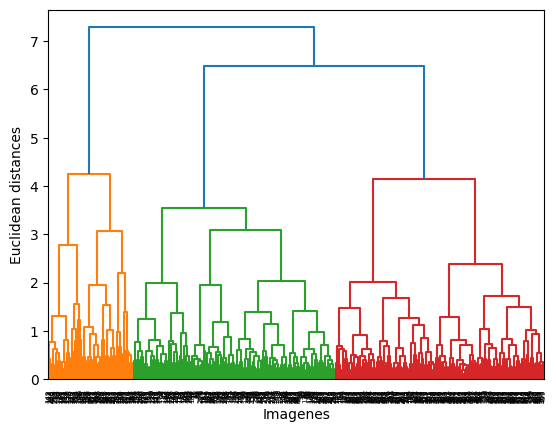

In [10]:
# Using the dendrogram to find the optimal number of clusters
dendrogram = sch.dendrogram(sch.linkage(df_combined_all_mm_cl, method = 'ward')) 
plt.xlabel('Imagenes')
plt.ylabel('Euclidean distances')
plt.show()

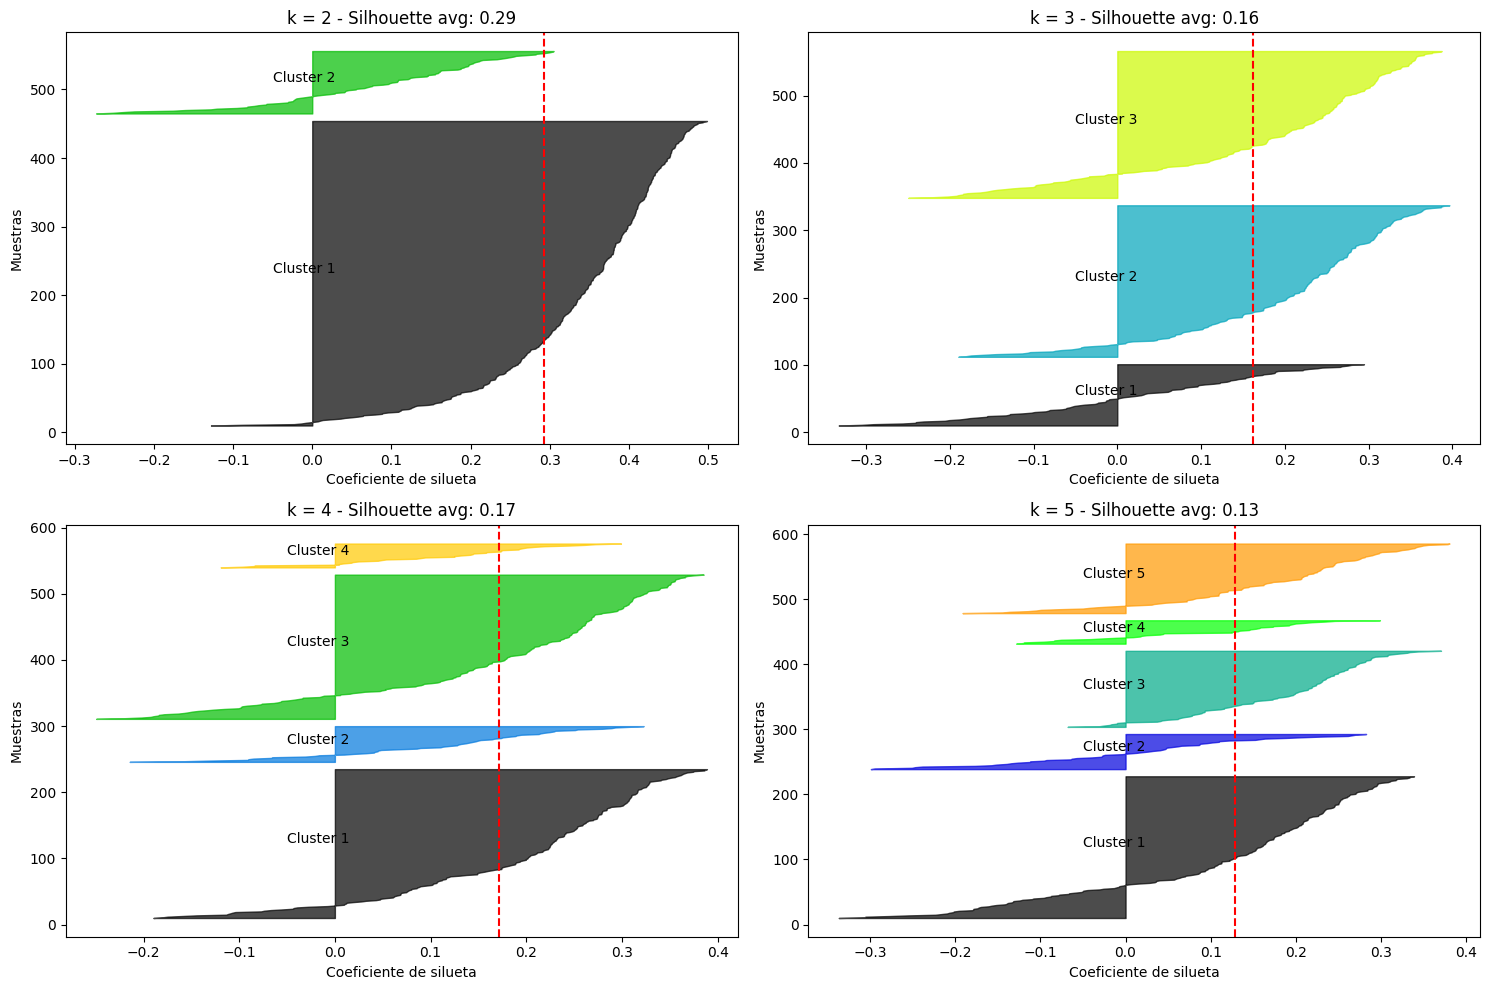

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probar con 2, 3, 4 y 5 clusters
for i, k in enumerate([2, 3, 4, 5]):
    clusterer = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
    labels = clusterer.fit_predict(df_combined_all_mm_cl)
    silhouette_vals = silhouette_samples(df_combined_all_mm_cl, labels)
    silhouette_avg = silhouette_score(df_combined_all_mm_cl, labels)

    # Subplot row/col
    row = i // 2
    col = i % 2
    ax_i = ax[row][col]
    y_lower = 10

    for j in range(k):
        j_silhouette_vals = silhouette_vals[labels == j]
        j_silhouette_vals.sort()
        size = len(j_silhouette_vals)
        y_upper = y_lower + size
        color = cm.nipy_spectral(float(j) / k)
        ax_i.fill_betweenx(np.arange(y_lower, y_upper), 0, j_silhouette_vals,
                           facecolor=color, edgecolor=color, alpha=0.7)
        ax_i.text(-0.05, y_lower + size / 2, f'Cluster {j+1}')
        y_lower = y_upper + 10

    ax_i.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax_i.set_title(f'k = {k} - Silhouette avg: {silhouette_avg:.2f}')
    ax_i.set_xlabel("Coeficiente de silueta")
    ax_i.set_ylabel("Muestras")

plt.tight_layout()
plt.show()

In [120]:
hc_mm = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
y_hc_mm = hc_mm.fit_predict(df_combined_all_mm_cl)

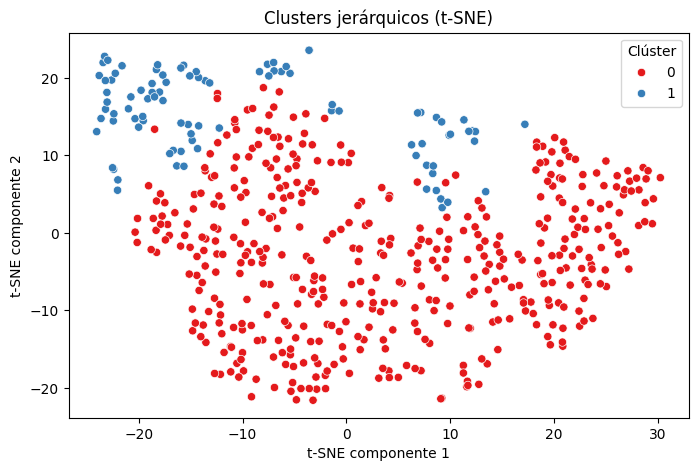

          filename    label  cluster
0      callo_1.png  smaller        0
1     callo_10.png  smaller        1
2    callo_100.png  smaller        0
3    callo_101.png  smaller        0
4    callo_102.png  smaller        0
..             ...      ...      ...
532   callo_95.png   higher        0
533   callo_96.png   higher        0
534   callo_97.png   higher        0
535   callo_98.png   higher        1
536   callo_99.png   higher        0

[537 rows x 3 columns]


In [121]:
#Visualización alternativa con t-SNE (
tsne_mm = TSNE(n_components=2, random_state=42)
X_tsne_mm = tsne_mm.fit_transform(df_combined_all_mm_cl)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_tsne_mm[:, 0], y=X_tsne_mm[:, 1], hue=y_hc_mm, palette='Set1')
plt.title('Clusters jerárquicos (t-SNE)')
plt.xlabel('t-SNE componente 1')
plt.ylabel('t-SNE componente 2')
plt.legend(title='Clúster')
plt.show()

df_resultado_mm = pd.DataFrame({
    'filename':df_combined_all_mm['filename'],
    'label': df_combined_all_mm['label'],
    'cluster': y_hc_mm
})

print(df_resultado_mm)

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


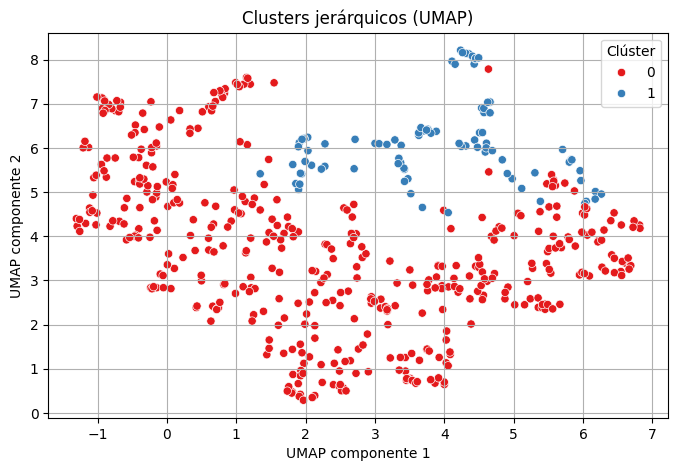

In [122]:
umap_mm = umap.UMAP(n_neighbors=10,n_components=2, random_state=42)
X_umap_mm = umap_mm.fit_transform(df_combined_all_mm_cl)


plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_mm[:, 0], y=X_umap_mm[:, 1], hue=y_hc_mm, palette='Set1')
plt.title('Clusters jerárquicos (UMAP)')
plt.xlabel('UMAP componente 1')
plt.ylabel('UMAP componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

In [123]:
# Crear la tabla de contingencia entre 'label' y 'cluster'
contingency_table = pd.crosstab(df_resultado_mm['label'], df_resultado_mm['cluster'])

# Mostrar la tabla de contingencia
print(contingency_table)

cluster    0   1
label           
higher   237  31
smaller  208  61


In [94]:
# y_hc_z son las etiquetas del clustering, df_fourier_z_cl los datos
score = silhouette_score(df_combined_all_mm_cl, y_hc_mm)
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.162


voy a reducir la dimensionalidad con umap

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_5468\1082482855.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_z_umap[:, 0], X_umap_z_umap[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


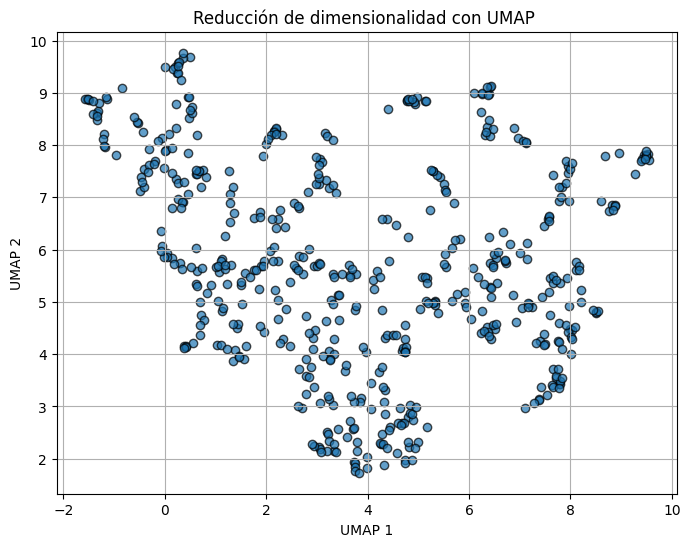

In [17]:
# Aplicar UMAP a los datos ya estandarizados y sin columnas no numéricas
umap_z_umap = umap.UMAP(n_neighbors=6,n_components=2, random_state=42) #7 #4 | #9 y #4 (salen 3 clsteres )| #9 y #6 (tres clusteres) cuando salen 3 clusteres hay dos con mas higher
X_umap_z_umap = umap_z_umap.fit_transform(df_combined_all_z_cl)

# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_z_umap[:, 0], X_umap_z_umap[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()
#con la combinacion 6 y 2componentes salen casi la misma silueta para 2,3,4 y 5 clusteres

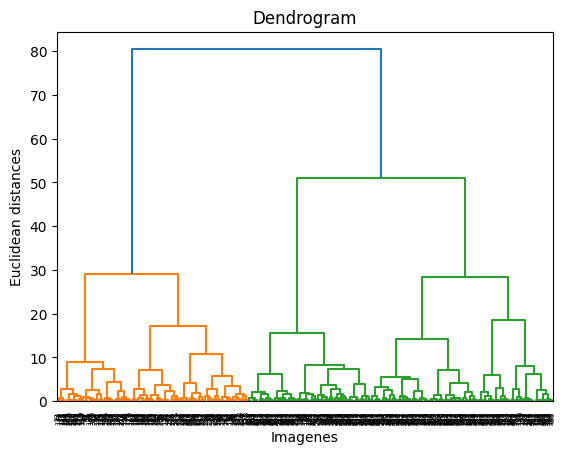

In [18]:
# Using the dendrogram to find the optimal number of clusters
dendrogram_z_umap = sch.dendrogram(sch.linkage(X_umap_z_umap, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Imagenes')
plt.ylabel('Euclidean distances')
plt.show()

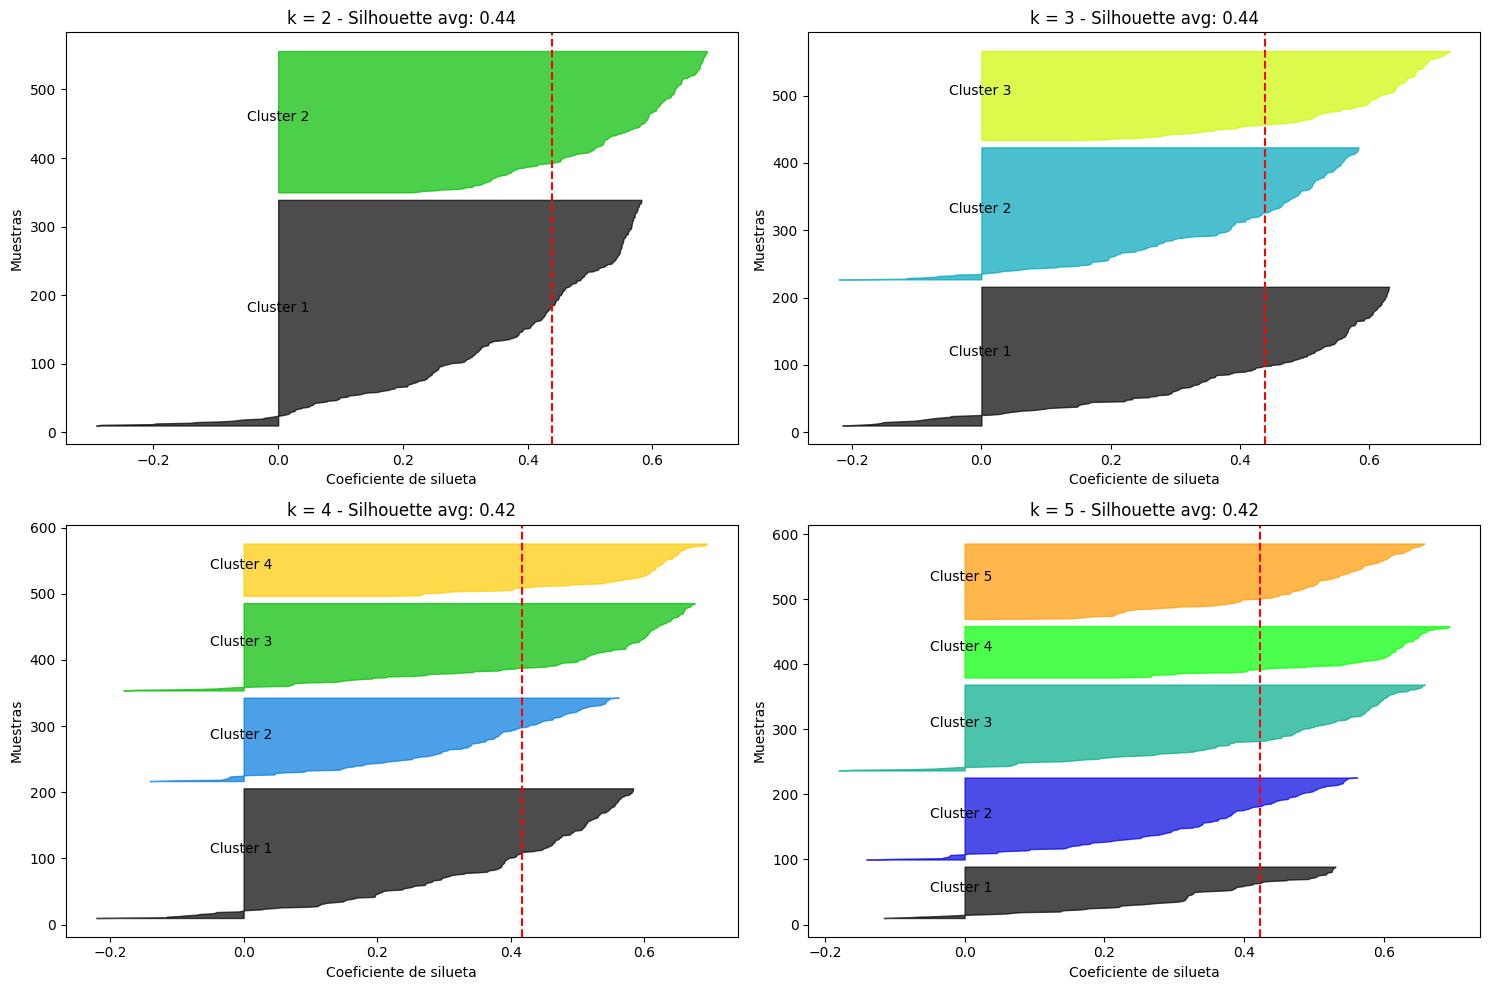

In [19]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probar con 2, 3, 4 y 5 clusters
for i, k in enumerate([2, 3, 4, 5]):
    clusterer_z = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
    labels = clusterer_z.fit_predict(X_umap_z_umap)  
    silhouette_vals_z = silhouette_samples(X_umap_z_umap, labels)
    silhouette_avg_z = silhouette_score(X_umap_z_umap, labels)

    # Subplot row/col
    row = i // 2
    col = i % 2
    ax_i = ax[row][col]
    y_lower = 10

    for j in range(k):
        j_silhouette_vals_z = silhouette_vals_z[labels == j]
        j_silhouette_vals_z.sort()
        size = len(j_silhouette_vals_z)
        y_upper = y_lower + size
        color = cm.nipy_spectral(float(j) / k)
        ax_i.fill_betweenx(np.arange(y_lower, y_upper), 0, j_silhouette_vals_z,
                           facecolor=color, edgecolor=color, alpha=0.7)
        ax_i.text(-0.05, y_lower + size / 2, f'Cluster {j+1}')
        y_lower = y_upper + 10

    ax_i.axvline(x=silhouette_avg_z, color="red", linestyle="--")
    ax_i.set_title(f'k = {k} - Silhouette avg: {silhouette_avg_z:.2f}')
    ax_i.set_xlabel("Coeficiente de silueta")
    ax_i.set_ylabel("Muestras")

plt.tight_layout()
plt.show()

In [124]:
hc_z_umap = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
y_hc_z_umap = hc_z_umap.fit_predict(X_umap_z_umap)

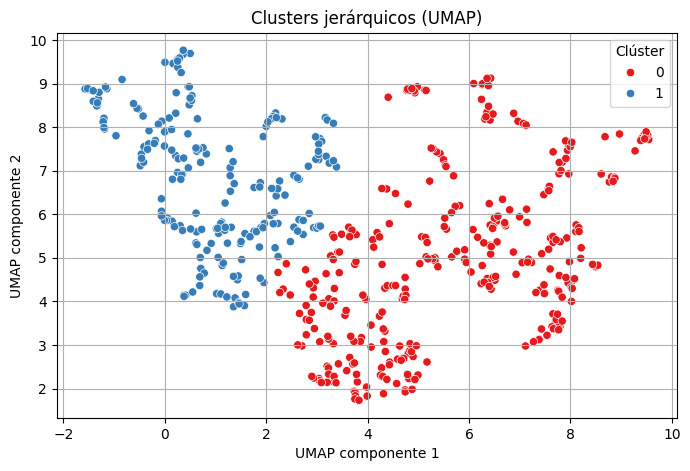

In [125]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_z_umap[:, 0], y=X_umap_z_umap[:, 1], hue=y_hc_z_umap, palette='Set1')
plt.title('Clusters jerárquicos (UMAP)')
plt.xlabel('UMAP componente 1')
plt.ylabel('UMAP componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

In [126]:
score_z_umap = silhouette_score(X_umap_z_umap, y_hc_z_umap)
print(f"Puntuación de silueta: {score_z_umap:.3f}")

Puntuación de silueta: 0.439


In [127]:
true_labels_z = df_combined_all_z['label']  
predicted_labels_umap_z = y_hc_z_umap

# Crear la tabla
contingency_table_umap_z = pd.crosstab(true_labels_z, predicted_labels_umap_z)

# Mostrar
print(contingency_table_umap_z)

col_0      0    1
label            
higher   258   10
smaller   72  197


con mimax

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
C:\Users\tere1\AppData\Local\Temp\ipykernel_5468\632451028.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_mm_umap[:, 0], X_umap_mm_umap[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


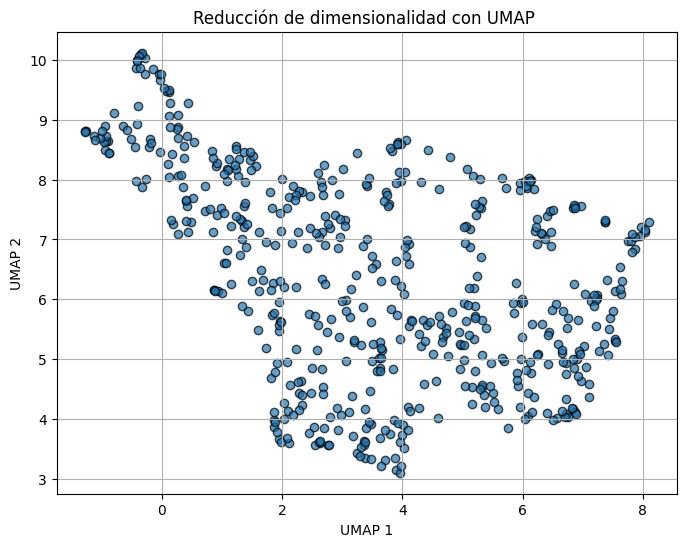

In [82]:
# Aplicar UMAP a los datos ya estandarizados y sin columnas no numéricas
umap_mm_umap = umap.UMAP(n_neighbors=13,n_components=2, random_state=42) #15 #4
X_umap_mm_umap = umap_mm_umap.fit_transform(df_combined_all_mm_cl)

# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_mm_umap[:, 0], X_umap_mm_umap[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()


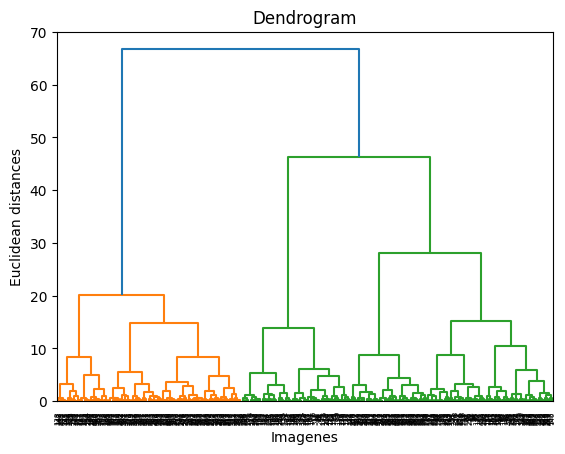

In [83]:
# Using the dendrogram to find the optimal number of clusters
dendrogram_mm_umap = sch.dendrogram(sch.linkage(X_umap_mm_umap, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Imagenes')
plt.ylabel('Euclidean distances')
plt.show()

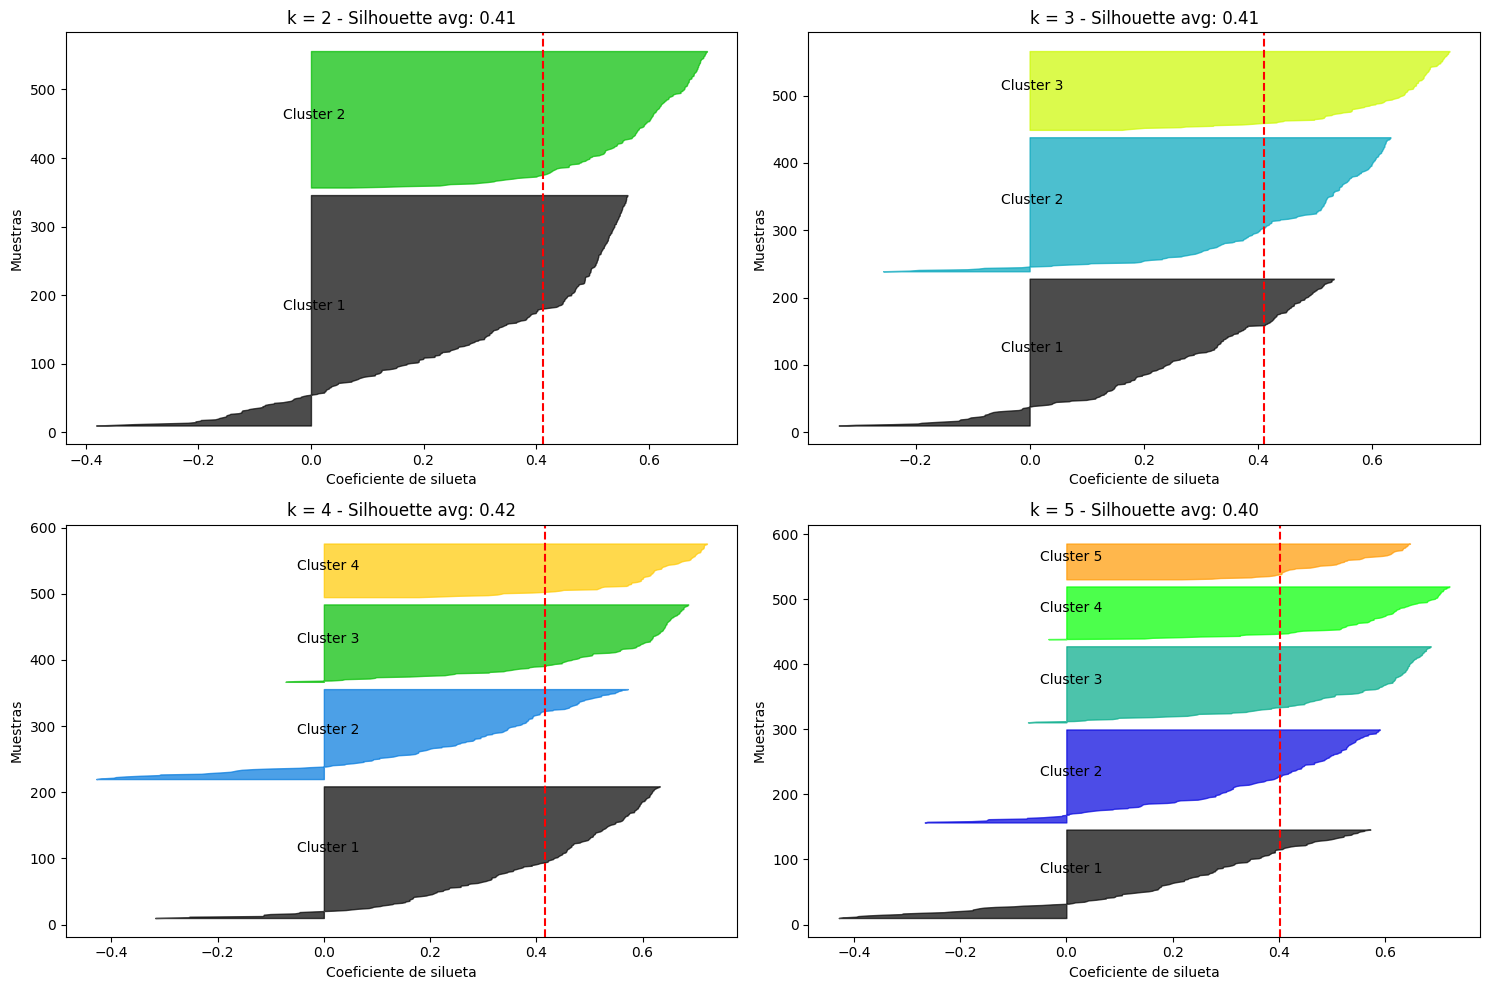

In [84]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Probar con 2, 3, 4 y 5 clusters
for i, k in enumerate([2, 3, 4, 5]):
    clusterer_mm = AgglomerativeClustering(n_clusters=k, linkage='ward', metric='euclidean')
    labels = clusterer_mm.fit_predict(X_umap_mm_umap)  
    silhouette_vals_mm = silhouette_samples(X_umap_mm_umap, labels)
    silhouette_avg_mm = silhouette_score(X_umap_mm_umap, labels)

    # Subplot row/col
    row = i // 2
    col = i % 2
    ax_i = ax[row][col]
    y_lower = 10

    for j in range(k):
        j_silhouette_vals_mm = silhouette_vals_mm[labels == j]
        j_silhouette_vals_mm.sort()
        size = len(j_silhouette_vals_mm)
        y_upper = y_lower + size
        color = cm.nipy_spectral(float(j) / k)
        ax_i.fill_betweenx(np.arange(y_lower, y_upper), 0, j_silhouette_vals_mm,
                           facecolor=color, edgecolor=color, alpha=0.7)
        ax_i.text(-0.05, y_lower + size / 2, f'Cluster {j+1}')
        y_lower = y_upper + 10

    ax_i.axvline(x=silhouette_avg_mm, color="red", linestyle="--")
    ax_i.set_title(f'k = {k} - Silhouette avg: {silhouette_avg_mm:.2f}')
    ax_i.set_xlabel("Coeficiente de silueta")
    ax_i.set_ylabel("Muestras")

plt.tight_layout()
plt.show()

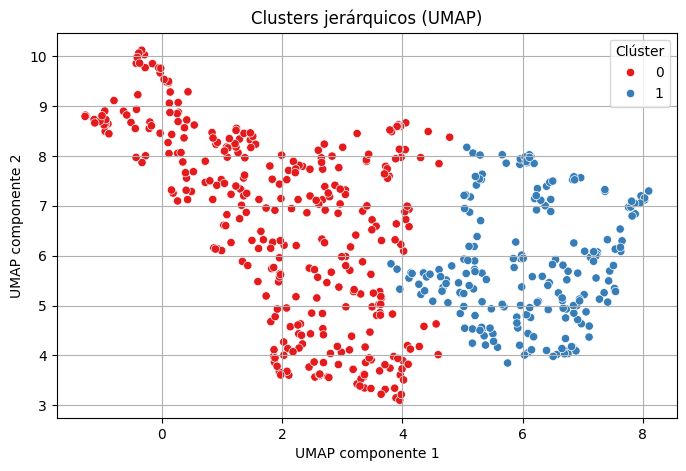

In [128]:
hc_mm_umap = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
y_hc_mm_umap = hc_mm_umap.fit_predict(X_umap_mm_umap)


plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_umap_mm_umap[:, 0], y=X_umap_mm_umap[:, 1], hue=y_hc_mm_umap, palette='Set1')
plt.title('Clusters jerárquicos (UMAP)')
plt.xlabel('UMAP componente 1')
plt.ylabel('UMAP componente 2')
plt.legend(title='Clúster')
plt.grid(True)
plt.show()

In [129]:
score_mm_umap = silhouette_score(X_umap_mm_umap, y_hc_mm_umap)
print(f"Puntuación de silueta: {score_mm_umap:.3f}")

Puntuación de silueta: 0.413


In [130]:
true_labels_mm = df_combined_all_mm['label']  
predicted_labels_umap_mm = y_hc_mm_umap

# Crear la tabla
contingency_table_umap_mm = pd.crosstab(true_labels_mm, predicted_labels_umap_mm)

# Mostrar
print(contingency_table_umap_mm)

col_0      0    1
label            
higher   118  150
smaller  219   50


Con zscore sin reducir con umap: dos clusteres que continen más imágenes higher, y uno que contien muchas smaller.
Con zscore con reduccion de la dimensionalidad ocn umap: se obtienen lo mismo, pero se ve mejor los clusteres.

Con la normalizacion minmax sin reducir con umap:tres clusteres donde en uno hay mas higher y en otro mas smaller, el restante es mezcla.
Con minmax reducido con umap: un cluster con mezcla equilibrada de ambos tipos de imágenes, cluster 1 on más higher y cluster 2 con más imágenes smaller.
Con dos clusteres uno está muy mezclado y en el otro hay 150 higher y 50 smaller.
